<a href="https://colab.research.google.com/github/Ratnasari124/PCVK_RATNASARI_2024/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PCVK WEEK 3**

**MODUL 3 – Operasi Citra Sederhana – Linier Brightness, Contrast,
Inverse, Logarithmic Brightness, dan Grayscale Image**

Nama :   Ratnasari

Kelas : TI 3D

NIM : 2241720007

Absen : 25

Link Pengerjaan :https://colab.research.google.com/drive/14t759ChLccoTYIeN9d5iOnUZOy6rKJYY?usp=sharing

# **PRAKTIKUM**

Akses Google Drive

In [9]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


**Transformasi Linier Brightness**

Formula : g(x, y) = f(x, y) + b

 g(x,y) adalah nilai pixel setelah transformasi,

 f(x,y) adalah nilai pixel asli, dan b adalah
nilai brightness.

Mengubah tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan: 50


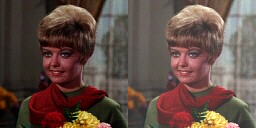

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

print('Mengubah tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/ratna/female.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

# **TUGAS PRAKTIKUM**

## 1.

1. Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang
terdapat pada bagian Ulasan Teori

Implementasi Inverse Citra
--------------------------------


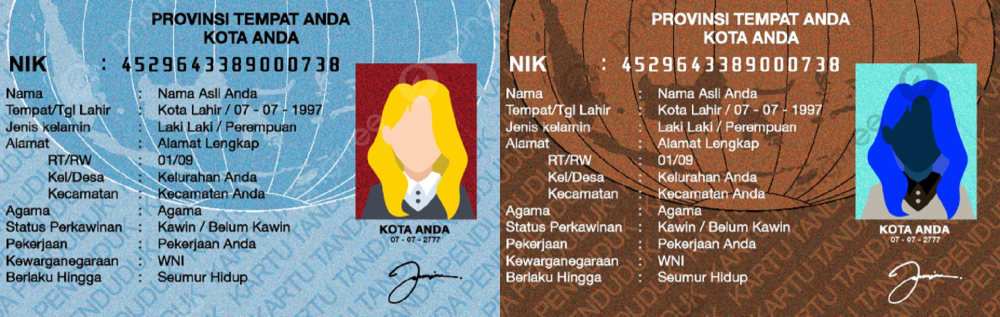

In [43]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np

print('Implementasi Inverse Citra')
print('--------------------------------')

# Baca gambar asli
original = cv.imread('/content/drive/MyDrive/ratna/gambar ktp.jpg')

#karena gambar terlalu besar jadi s\akan saya kurangi ukuran nya sebanyak 50%
# Ubah ukuran gambar (contoh: skala 50% dari ukuran asli)
scale_percent = 50  # Skala 50%
width = int(original.shape[1] * scale_percent / 100)
height = int(original.shape[0] * scale_percent / 100)
dim = (width, height)

# Resize gambar asli dan inverse
original_resized = cv.resize(original, dim, interpolation=cv.INTER_AREA)

#mengcopy gambar original
inverse_image = np.copy(original_resized)

# Implementasi inverse citra (menggunakan formula 255 - pixel_value)
inverse_image = 255 - inverse_image

# Gabungkan citra asli dan citra inverse untuk perbandingan
final_frame = cv.hconcat((original_resized, inverse_image))
# Tampilkan hasilnya
cv2_imshow(final_frame)



PENJELASAN : pada kode ini dapat disimpulkan bertujuan untuk mengubah warna pada gambar dengan mengurangi nilai setiap pixel dengan 255(index warna yang paling tinggi) agar menghasilkan nilai pixel kebalikannya. Sehingga dapat menampilkan warna citra negatif. (jika warna dengan nilai pixel tinggi dalam arti cerah maka akan menghasilkan kebalikannya yaitu nilai pixelnya berkurang atau rendah dan menghasilkan warna mendekati gelap) begitupun sebaliknya

## 2.


2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan
formula yang terdapat pada bagian Ulasan Teori untuk kontras

Mengubah kontras dan tingkat kecerahan citra
--------------------------------
Masukkan nilai kecerahan [-255 - 255]: 50
Masukkan nilai kontras [1.0 - 3.0]: 2


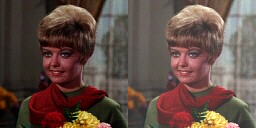

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

print('Mengubah kontras dan tingkat kecerahan citra')
print('--------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan [-255 - 255]: '))
  contrast = int(input('Masukkan nilai kontras [1.0 - 3.0]: '))
  if contrast < 1.0 or contrast > 3.0:
    raise ValueError
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/ratna/female.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

PENJELASAN : dari hasil no 2 ini kode yang dijalankan bertujuan untuk mengubah kecerahan dan kontras pada gambar original, kemudian kedua aspek yang di ubah tadi di tampilkan sehingga dapat dilihat perbedaan gambar yang terjadi

## 3.

3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory
menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi
log

Mengubah tingkat kecerahan citra dengan transformasi log
--------------------------------------------------------
Masukkan nilai kecerahan: 50


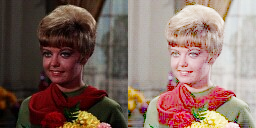

In [15]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np

# Input nilai kecerahan
print('Mengubah tingkat kecerahan citra dengan transformasi log')
print('--------------------------------------------------------')
brightness = float(input('Masukkan nilai kecerahan: '))

# Baca gambar asli
image_path = '/content/drive/MyDrive/ratna/female.jpg'
original = cv.imread(image_path)

#proses gambar kontras
c = 255 / np.log(1 + np.max(original))
# Terapkan transformasi log dan tambahkan faktor kecerahan
log_transformed = c * (np.log(original.astype(np.float32) + 1))
# Normalisasi ke rentang [0, 255] dan ubah kembali ke tipe uint8
log_transformed = np.uint8(np.round(log_transformed))

# meningkatkan kecerahan pada gambar secara keseluruhan dengan tingkat kecerahan
# yang telah ditentukan pada variabel brightness (input)
brightened_image = cv.add(log_transformed, brightness)

# Gabungkan citra asli dan citra hasil transformasi log untuk perbandingan
final_frame = cv.hconcat((original, log_transformed))

# Tampilkan hasilnya
cv2_imshow(final_frame)


PENJELASAN : dapat dipahami bagaimana cara untuk mengatur kontras pada gambar serta meningkatkan kecerahan gambar dengan menggunakan implementasi transformasi logarithmic

## 4.

Implementasikan transformasi grayscale menggunakan metode averaging, lightness,
dan luminance

a. Averaging

Hasil Grayscale: Metode Averaging
---------------------------------


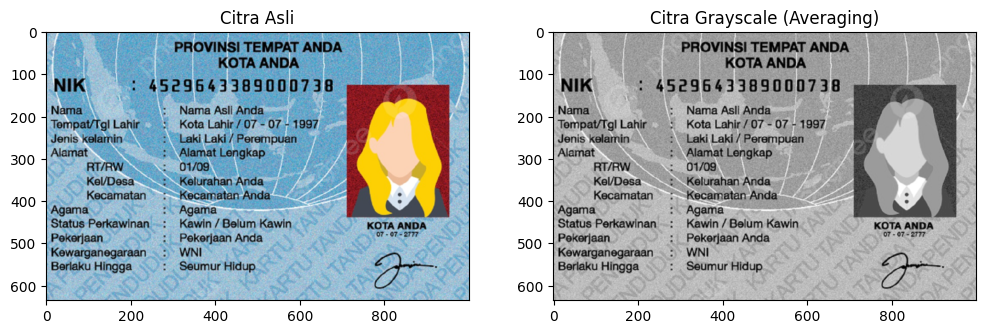

In [18]:
import cv2 as cv
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Baca gambar
img = cv.imread('/content/drive/MyDrive/ratna/gambar ktp.jpg')

print("Hasil Grayscale: Metode Averaging")
print('---------------------------------')

# Ubah citra menjadi citra grayscale dengan metode averaging
grayscale_image = np.mean(img, axis=2)

#Menampilkan citra asli dan transformasinya
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title('Citra Asli')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('on')

plt.subplot(122)
plt.title('Citra Grayscale (Averaging)')
plt.imshow(grayscale_image, cmap='gray')
plt.axis('on')

plt.show()

b. Lightness

Hasil Grayscale: Metode Lightness
---------------------------------


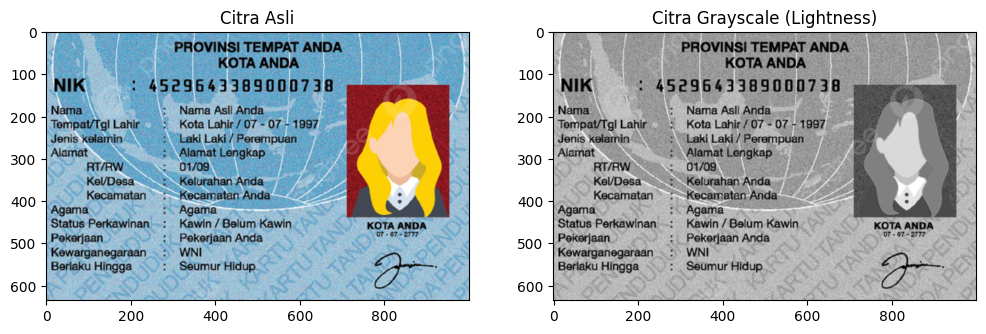

In [22]:
import cv2 as cv
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Baca gambar
img = cv.imread('/content/drive/MyDrive/ratna/gambar ktp.jpg')

print("Hasil Grayscale: Metode Lightness")
print('---------------------------------')

#rumus awal hasil nya tidak sesuai jadi dibenahi
#grayscale_image = ((np.max(img, axis=2)) + (np.min(img, axis=2))) / 2

#rumus yang benar
grayscale_image = (np.max(img, axis=2))/2 + (np.min(img, axis=2)) / 2

# Menampilkan citra asli dan citra grayscale
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title('Citra Asli')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('on')

plt.subplot(122)
plt.title('Citra Grayscale (Lightness)')
plt.imshow(grayscale_image, cmap='gray')
plt.axis('on')
plt.show()

c. Luminannce

Hasil Grayscale: Metode Luminance
---------------------------------


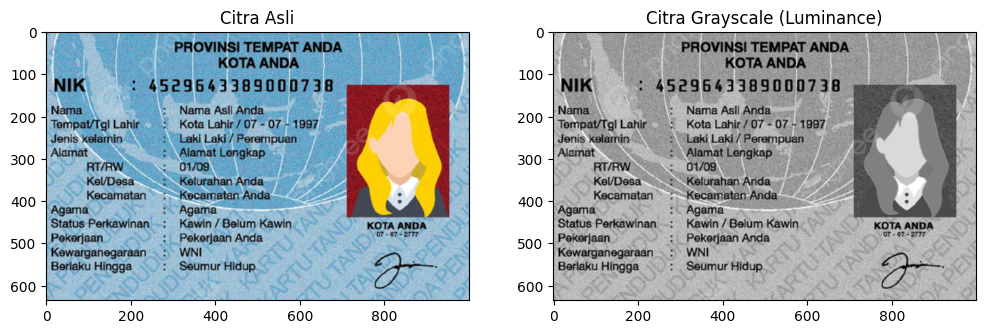

In [26]:
import cv2 as cv
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# Baca gambar
img = cv.imread('/content/drive/MyDrive/ratna/gambar ktp.jpg')

print("Hasil Grayscale: Metode Luminance")
print('---------------------------------')

#Metode 3: Grayscale dengan metode Luminance, ini pake kode warna seperti [R,G,B]
luminance_image = (0.21 * original[:, :, 2] + 0.72 * original[:, :, 1] + 0.07 * original[:, :, 0]).astype(np.uint8)

# Menampilkan citra asli dan citra grayscale
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title('Citra Asli')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('on')

plt.subplot(122)
plt.title('Citra Grayscale (Luminance)')
plt.imshow(grayscale_image, cmap='gray')
plt.axis('on')
plt.show()

## 5.

Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal,
tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna
biru menjadi grayscale seperti pada contoh berikut:

Tampilkan warna merah pada citra, dan ubah warna lain menjadi grayscale
-----------------------------------------------------------------------


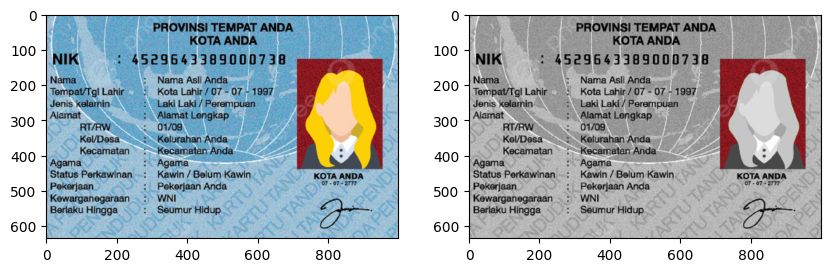

In [41]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar
img = cv.imread('/content/drive/MyDrive/ratna/gambar ktp.jpg')

print('Tampilkan warna merah pada citra, dan ubah warna lain menjadi grayscale')
print('-----------------------------------------------------------------------')

# Definisikan rentang warna merah dalam ruang warna BGR
#jadi kalo mau ubah warna bisa disesuaikan lewat ini
lower_red = np.array([0, 0, 100])
upper_red = np.array([100, 100, 255])

# Buat mask untuk piksel berwarna merah
mask_red = cv.inRange(img, lower_red, upper_red)

# Pisahkan area yang berwarna merah
red_pixels = cv.bitwise_and(img, img, mask=mask_red)

# Konversi bagian lain gambar ke grayscale
gray_image = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_image = cv.cvtColor(gray_image, cv.COLOR_GRAY2BGR)

# Gabungkan area merah dengan sisa gambar yang diubah ke grayscale
mask_inv = cv.bitwise_not(mask_red)
gray_pixels = cv.bitwise_and(gray_image, gray_image, mask=mask_inv)

# Gabungkan citra merah dan grayscale
result_image = cv.add(red_pixels, gray_pixels)

# Konversi BGR ke RGB untuk ditampilkan dengan plt (karena plt menggunakan format RGB)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
result_image_rgb = cv.cvtColor(result_image, cv.COLOR_BGR2RGB)

# Tampilkan gambar asli dan gambar hasil perubahan menggunakan plt
plt.figure(figsize=(10, 5))  # Atur ukuran figure

# Gambar pertama (gambar asli)
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)

# Gambar kedua (hasil pengolahan)
plt.subplot(1, 2, 2)
plt.imshow(result_image_rgb)

# Tampilkan gambar
plt.show()
